# Exercice 1

## Dataset :
Essayons de comprendre l'algorithme Perceptron en utilisant les données suivantes comme
exemple motivant.

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

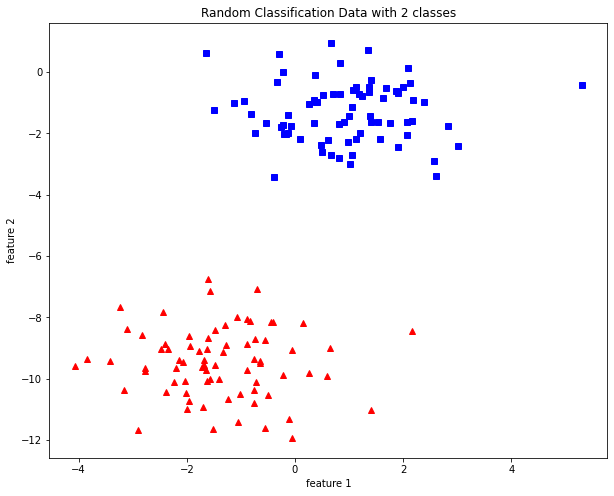

In [238]:
from matplotlib import pyplot as plt
from sklearn import datasets
X, y = datasets.make_blobs (n_samples=150, n_features=2,
centers=2, cluster_std=1.05,

random_state=2)

#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

Il y a deux classes, rouge et bleue, et nous voulons les séparer en traçant une ligne droite entre
elles. Ou, plus formellement, nous voulons apprendre un ensemble de paramètres wi pour
trouver un hyperplan optimal (ligne droite pour nos données) qui sépare les deux classes.

## 3. Implémentation :
Nous pouvons visuellement comprendre le Perceptron en regardant la figure ci-dessous. Pour
chaque exemple d’apprentissage, nous prenons d'abord le produit scalaire des caractéristiques
et paramètres d'entrée,w. Ensuite, nous appliquons la fonction d’activation pour faire la
prédiction (y_hat).

1. Coder la fonction d’activation de Heaviside :
∀x ∈ R,g(x) = 
1 si x > 0
0 sinon

In [239]:
def acti_func(z):
    return 1 if z>0 else 0
    

In [240]:
import numpy as np


def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        # variable to store #misclassified.
        n_miss = 0  
        # looping for every example.
        for idx, x_i in enumerate(X):
        # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w= w +lr*( y[idx]-np.squeeze(y_hat) )*x_i
                # Incrementing by 1.
                n_miss+=1
            # Appending number of misclassified examples
            # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list

In [241]:
w,nmiss=perceptron(X,y,0.9,15)

In [242]:
def plot_decision_boundary(X, w):
    # X --> Inputs
    # w --> parameters
    # The Line is y=mx+c
    # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1] / w[2]  # Slope
    c = -w[0] / w[2]  # Intercept
    x2 = m*x1 + c
    # Plotting
    plt.plot(x1, x2, color='r', label='Decision Boundary')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k', label='Data Points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

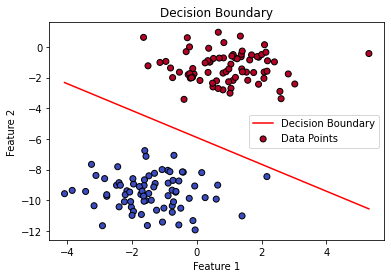

In [243]:
plot_decision_boundary(X,w)

# Exercice 2 
## Dataset


In [244]:
from sklearn.datasets import make_blobs


def plot(X,y):

    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Random Classification Data with 2 classes')

    
def genInstances(sig1, sig2):
    instances_1, y1 = make_blobs(n_samples=125, centers=[(-1, 0)], cluster_std=sig1)
    instances_2, y2 = make_blobs(n_samples=125, centers=[(1, 0)], cluster_std=sig2)
    instances = np.concatenate([instances_1, instances_2], axis=0)
    labels = np.concatenate([y1, y2 + 1], axis=0)
    # plot(instances, labels)

    return instances, labels






### experience 1 et 2

In [245]:
sig1= 0.75
sig2= 0.75

instances, labels=genInstances(sig1,sig2)


In [246]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.2, random_state=42)


In [247]:
w,nmiss=perceptron(X_train,y_train,0.1,150)
w

array([[ 0.1       ],
       [ 0.27507628],
       [-0.06532772]])

In [248]:
def plot_decision_boundary(X, w,labels):
    # X --> Inputs
    # w --> parameters
    # The Line is y=mx+c
    # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1] / w[2]  # Slope
    c = -w[0] / w[2]  # Intercept
    x2 = m*x1 + c
    # Plotting
    plt.plot(x1, x2, color='r', label='Decision Boundary')
    plt.scatter(X[:,0], X[:,1],c=labels ,cmap='coolwarm', edgecolors='k', label='Data Points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()
    # return m,c

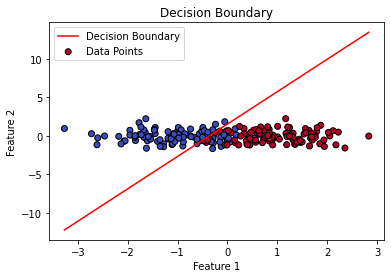

In [249]:
plot_decision_boundary(X_train,w,y_train)


### Experience 3

In [250]:
def predict(X, w):
    """
    Predict labels for a given set of instances.
    
    Parameters:
    X (array-like): Input instances.
    w (array-like): Model parameters (weights).
    
    Returns:
    y_pred (array-like): Predicted labels.
    """
    # Calculate the dot product of instances and weights
    z = np.dot(X, w[1:]) + w[0]
    
    # Apply step function to obtain binary predictions
    y_pred = np.where(z >= 0, 1, 0)
    
    return y_pred


y_pred = predict(X_test, w)


In [258]:
def evaluate(y_pred, y_true):
    """
    Calculate the accuracy of classification.
    
    Parameters:
    y_pred (array-like): Predicted labels.
    y_true (array-like): True labels.
    
    
    Returns:
    accuracy (float): Accuracy of classification.
    """
    # Ensure both arrays have the same length
    if len(y_pred) != len(y_true):
        raise ValueError("Arrays y_pred and y_true must have the same length.")
    
    # Calculate the number of correct predictions
    correct_predictions = 0
    for i in range(len(y_pred)):
        if y_pred[i]== y_true[i]:
            correct_predictions+=1
        
    
    # Calculate the total number of instances
    total_instances = len(y_true)
    # Calculate accuracy
    accuracy = correct_predictions / total_instances
    error= 1-accuracy
    
    return accuracy,error

accuracy , error= evaluate(y_pred, y_test)
error

0.19999999999999996

In [259]:
def experience(sig1, sig2):
    instances, labels=genInstances(sig1,sig2)
    X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.2, random_state=42)
    w,_=perceptron(X_train,y_train,0.1,20)
    # plot_decision_boundary(X_train,w,y_train)
    y_pred = predict(X_test, w)
    accuracy, error = evaluate(y_pred, y_test)
    return  accuracy, error


    
    

In [263]:
sigmas=[0.01, 0.1, 0.5, 0.7]
errors=[]
accuracies=[]
for sigma in sigmas:
    print("**************** sigma= ", sigma, "****************")
    sum_of_acc=0
    sum_of_err=0
    for i in range(30):
        acc,err= experience(sigma,sigma)
        sum_of_acc+=acc
        sum_of_err+=err
    errors.append(sum_of_err/30)
    accuracies.append(sum_of_acc/30)
    print("average error: ", err)
    print("average accuracy : ", acc)

        

**************** sigma=  0.01 ****************


average error:  0.0
average accuracy :  1.0
**************** sigma=  0.1 ****************
average error:  0.0
average accuracy :  1.0
**************** sigma=  0.5 ****************
average error:  0.020000000000000018
average accuracy :  0.98
**************** sigma=  0.7 ****************
average error:  0.09999999999999998
average accuracy :  0.9


Text(0.5, 1.0, 'Error Bars')

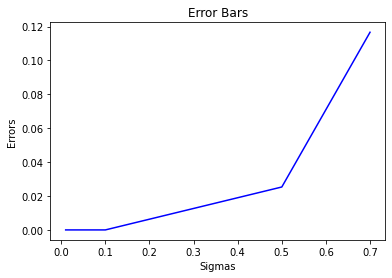

In [267]:
plt.errorbar(sigmas,errors , color='b', ecolor='r', capsize=5)
plt.xlabel('Sigmas')
plt.ylabel('Errors')
plt.title('Error Bars')